In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import random
%matplotlib inline

In [2]:
data=pd.read_csv('/share/data/analyses/Pousali/morphological_struc_combined/combinedwithmoa.csv',sep=';')
data.head()

,Unnamed: 0.1,Unnamed: 0,batch_id,project,compound,cbkid,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cmpd_conc,Count_nuclei,Batch nr,NAME,moa,target,grit
0,0,3,BJ1894004,specs2k,BJ1894004_bicuculline-(+),CBK041821,-0.334708,0.156941,0.590127,-0.246130,...,-0.337210,-0.337307,0.197138,10.0,149.75,BJ1894004,bicuculline-(+),GABA receptor antagonist,GABRA1|GABRA2|GABRA3|GABRA4|GABRA5|GABRA6|KCNN1,1.236210
1,1,5,BJ1894006,specs2k,BJ1894006_Triglycidyl isocyanurate,CBK307727,16.623794,17.947190,-0.121545,0.106786,...,-1.091671,0.919922,-0.513462,10.0,74.25,BJ1894006,Triglycidyl isocyanurate,DNA inhibitor,NaN,4.273546
2,2,7,BJ1894008,specs2k,BJ1894008_CPP,CBK040806,-0.376194,-0.346138,-0.166992,0.332820,...,-0.009486,-0.006207,0.416918,10.0,144.50,BJ1894008,CPP,glutamate receptor antagonist,GRIN1|GRIN2A|GRIN2B|GRIN2C|GRIN2D,1.266229
3,3,47,BJ1894048,specs3k,BJ1894048_beta-CCB,CBK040862,-0.982822,-1.034848,-0.400676,0.076835,...,0.021405,-0.132617,-0.329244,10.0,183.00,BJ1894048,beta-CCB,benzodiazepine receptor ligand,GABRA1|GABRG2,1.049357
4,4,51,BJ1894052,specs2k,BJ1894052_AG-490,CBK040864,0.865656,0.278737,-0.402220,-0.309388,...,-0.174719,-0.366336,0.268275,10.0,130.75,BJ1894052,AG-490,EGFR inhibitor|JAK inhibitor,EGFR|JAK2|JAK3,1.526691


In [3]:
data.shape

(1686, 1133)

In [4]:
df=data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Batch nr','NAME','target','cmpd_conc','Count_nuclei','batch_id','project','compound','cbkid','grit'], inplace=False)
df.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,moa
0,-0.334708,0.156941,0.590127,-0.246130,0.586835,-0.305849,0.593464,-0.275219,-0.112522,-0.227460,...,0.337339,0.190170,-0.190621,-0.397169,0.039265,-0.072516,-0.337210,-0.337307,0.197138,GABA receptor antagonist
1,16.623794,17.947190,-0.121545,0.106786,-0.098220,0.030972,-0.098050,0.057107,4.867057,16.696257,...,-1.180958,-0.049052,-0.261503,0.024345,0.631004,-0.606232,-1.091671,0.919922,-0.513462,DNA inhibitor
2,-0.376194,-0.346138,-0.166992,0.332820,-0.187469,0.271699,-0.139792,0.319898,0.745270,-0.457474,...,0.013738,0.423440,0.027817,0.212883,-0.123299,0.099782,-0.009486,-0.006207,0.416918,glutamate receptor antagonist
3,-0.982822,-1.034848,-0.400676,0.076835,-0.405240,0.113373,-0.406422,0.100183,-0.290802,-1.069124,...,0.297964,-0.209325,0.518642,-0.539594,-0.256171,-0.541304,0.021405,-0.132617,-0.329244,benzodiazepine receptor ligand
4,0.865656,0.278737,-0.402220,-0.309388,-0.357712,-0.262058,-0.379998,-0.271274,-0.626352,0.527191,...,0.352460,0.352502,0.222036,0.413877,-0.151035,0.102252,-0.174719,-0.366336,0.268275,EGFR inhibitor|JAK inhibitor


In [5]:
df.shape

(1686, 1121)

In [6]:
known_moa=df[df['moa'].notna()]
unknown_moa = df[df['moa'].isna()]

In [7]:
known_moa.shape

(1552, 1121)

In [8]:
moa_classes=['dopamine receptor antagonist','serotonin receptor antagonist','phosphodiesterase inhibitor',
             'EGFR inhibitor','adrenergic receptor antagonist','cyclooxygenase inhibitor','adrenergic receptor agonist',
             'PI3K inhibitor','HDAC inhibitor','topoisomerase inhibitor','adrenergic receptor agonist','calcium channel blocker',
             'acetylcholine receptor antagonist','histamine receptor antagonist','CDK inhibitor']
filtered_df= known_moa[known_moa['moa'].isin(moa_classes)]

In [9]:
filtered_df.shape

(287, 1121)

In [10]:
specs2k=pd.read_parquet('/share/data/analyses/maris/specs2k/ImageMedianFeaturesNormalized/specs2k_dfZscoresNormalizedPerPlateWithDMSOMedianMAD.parquet')


In [11]:
specs3k=pd.read_parquet('/share/data/analyses/maris/specs3k_uncroped/ImageMedianFeaturesNormalized/specs3k_dfZscoresNormalizedPerPlateWithDMSOMedianMAD.parquet')

In [12]:
common_columns = [col for col in specs2k.columns if col in data.columns]
specs_filtered = specs2k[common_columns]

In [13]:
com_col=[col for col in specs3k.columns if col in data.columns]
specs_fil = specs3k[com_col]

In [14]:
specs=pd.concat([specs_filtered, specs_fil], axis=0)
specs.shape

(229987, 1123)

In [15]:
specs = specs.merge(data[['batch_id', 'moa', 'grit']], on='batch_id', how='left')

In [16]:
known_moa=specs[specs['moa'].notna()]

In [17]:
known_moa.shape

(54781, 1125)

In [18]:
known_moa.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cbkid,batch_id,cmpd_conc,moa,grit
81,-0.439856,-1.077736,-0.129031,-2.239606,-0.103969,-2.166343,-0.121322,-2.188400,-1.131136,-0.580529,...,0.883211,0.740310,-0.508440,0.962392,1.214709,CBK290742,BJ1898580,10.0,phosphodiesterase inhibitor,1.0617
82,-2.412338,-2.697022,-2.015165,-1.450932,-1.994314,-1.497216,-1.965903,-1.436429,-0.629332,-2.379163,...,0.235312,-1.564495,3.360786,0.974477,0.274539,CBK290742,BJ1898580,10.0,phosphodiesterase inhibitor,1.0617
83,-2.048082,-2.445014,2.216302,0.850937,2.179568,0.846574,2.199537,0.866562,3.457263,-2.036885,...,3.313036,1.911861,1.659529,-0.378689,-1.786302,CBK290742,BJ1898580,10.0,phosphodiesterase inhibitor,1.0617
84,-1.333315,-1.276126,-0.212522,-0.232074,-0.081285,-0.236597,-0.146984,-0.214585,1.461723,-1.453001,...,-0.050713,-1.103629,1.752592,-1.102730,-0.313893,CBK290742,BJ1898580,10.0,phosphodiesterase inhibitor,1.0617
85,0.336765,-0.461121,-0.053131,2.677338,0.028355,2.661718,-0.006640,2.654670,0.848862,0.285231,...,-1.656535,0.610836,2.262636,-1.002898,-0.708291,CBK290742,BJ1898580,10.0,phosphodiesterase inhibitor,1.0617


In [19]:
model_df=known_moa[known_moa['moa'].isin(moa_classes)]
model_df.shape

(10024, 1125)

In [20]:
model_df.tail(10)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cbkid,batch_id,cmpd_conc,moa,grit
218874,-36.289423,-23.276684,-2.109705,-4.315604,-2.042641,-4.218677,-2.091491,-4.237618,29.523611,-30.444008,...,-0.392617,-5.321940,-7.720412,-11.261761,-2.517021,CBK293858,BJ1899057,10.0,CDK inhibitor,4.200369
219039,1.895883,2.138440,0.504699,0.358116,0.472351,0.366514,0.472405,0.340915,-2.369334,1.928288,...,4.974536,-1.028440,0.727484,2.886619,-1.065109,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219040,1.591054,2.015364,-0.031348,-2.157802,-0.052132,-2.110093,-0.048137,-2.147627,0.178175,1.655890,...,-0.979181,1.037627,-0.009343,-0.699179,0.625423,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219041,0.037174,0.733326,1.300932,-0.685884,1.281193,-0.641022,1.306961,-0.690653,-1.998999,0.050178,...,0.924284,-1.430265,-0.062373,-1.345577,0.075946,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219042,-2.304798,-1.994851,-0.727268,-0.525035,-0.598732,-0.484160,-0.684692,-0.529953,-1.900440,-2.358389,...,-1.967146,2.623824,-0.532255,2.262886,-1.179079,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219043,-0.022305,-0.958965,0.724133,-0.940814,0.642966,-0.876314,0.682809,-0.828675,0.477272,-0.107525,...,0.442600,-0.192785,-0.418966,-0.357317,-2.259793,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219044,-0.921919,-0.764095,0.852659,-1.059174,0.911527,-1.075408,0.892851,-1.082933,-1.536504,-0.917550,...,-0.720995,0.742722,-0.024682,1.258300,-0.559532,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219045,-1.256487,-2.025620,1.376167,-1.110767,1.341224,-1.162889,1.376447,-1.118077,-2.804509,-1.397829,...,0.496150,-1.686545,-0.117058,1.511713,-0.737118,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219046,-0.565047,-0.051282,-0.764885,-0.349012,-0.734593,-0.387630,-0.744153,-0.385891,2.719824,-0.508953,...,-1.864463,-1.276063,-1.796768,0.090072,-3.006249,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980
219047,0.527873,0.456406,1.131654,0.121395,1.205364,0.119155,1.161650,0.097560,-2.025670,0.781351,...,-1.238472,1.374167,-1.032509,-0.558638,0.569605,CBK290903,BJ1898717,10.0,serotonin receptor antagonist,1.315980


In [21]:
moa_counts = model_df['moa'].value_counts()
largest_moa_counts = moa_counts[moa_classes]
largest_moa_counts

moa
dopamine receptor antagonist         1074
serotonin receptor antagonist         529
phosphodiesterase inhibitor           684
EGFR inhibitor                       1097
adrenergic receptor antagonist        627
cyclooxygenase inhibitor              540
adrenergic receptor agonist           540
PI3K inhibitor                        789
HDAC inhibitor                        693
topoisomerase inhibitor               575
adrenergic receptor agonist           540
calcium channel blocker               605
acetylcholine receptor antagonist     573
histamine receptor antagonist         755
CDK inhibitor                         943
Name: count, dtype: int64

In [22]:
threshold=700
undersampled_df = pd.DataFrame()

for moa_class, count in moa_counts.items():
    class_df = model_df[model_df['moa'] == moa_class]

    if count > threshold:
        # Sort batches randomly to ensure unbiased removal
        batch_groups = class_df.groupby('batch_id')
        batch_ids = class_df['batch_id'].unique()

        # Calculate how many need to be removed
        num_to_remove = count - threshold  

        # Select rows for removal, but ensuring each batch_id is partially kept
        drop_indices = []
        
        for batch_id in batch_ids:
            batch_df = batch_groups.get_group(batch_id)
            batch_size = len(batch_df)

            if batch_size > 1 and num_to_remove > 0:
                # Decide how many replicates to remove (keep at least 1)
                remove_count = min(batch_size - 1, num_to_remove)
                drop_indices.extend(batch_df.sample(remove_count, random_state=42).index)
                num_to_remove -= remove_count

            if num_to_remove <= 0:
                break
        
        # Remove selected replicates
        class_df = class_df.drop(index=drop_indices)
    
    # Append the processed class to the final undersampled dataset
    undersampled_df = pd.concat([undersampled_df, class_df])

# Reset index
undersampled_df = undersampled_df.reset_index(drop=True)

In [23]:
under_set=set(undersampled_df['cbkid'].unique())
model_set=set(model_df['cbkid'].unique())
unique_id=model_set-under_set
print(unique_id)

set()


In [24]:
undersampled_df.shape

(8866, 1125)

In [25]:
undersampled_df['moa'].value_counts()

moa
EGFR inhibitor                       700
dopamine receptor antagonist         700
CDK inhibitor                        700
PI3K inhibitor                       700
histamine receptor antagonist        700
HDAC inhibitor                       693
phosphodiesterase inhibitor          684
adrenergic receptor antagonist       627
calcium channel blocker              605
topoisomerase inhibitor              575
acetylcholine receptor antagonist    573
cyclooxygenase inhibitor             540
adrenergic receptor agonist          540
serotonin receptor antagonist        529
Name: count, dtype: int64

In [26]:
undersampled_df.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cbkid,batch_id,cmpd_conc,moa,grit
0,1.705456,1.588525,-2.934761,-1.143295,-2.915730,-1.113558,-2.947458,-1.119170,-2.828956,1.433103,...,-1.309346,-2.321592,-1.184196,1.225049,-0.556798,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471
1,-2.434752,-1.540412,-0.534423,-1.569052,-0.197367,-1.694206,-0.342965,-1.658075,-2.308481,-2.687466,...,-1.090688,-0.961780,-0.225351,2.082146,-2.140218,CBK013251,BJ1897081,10.0,EGFR inhibitor,4.081928
2,-1.407123,-2.180161,-1.580495,1.503462,-1.438724,1.536831,-1.466531,1.495547,-0.971894,-1.227569,...,-1.180859,6.546944,9.815185,-5.949243,0.902199,CBK278131,BJ1898636,10.0,EGFR inhibitor,3.134159
3,-2.572814,-2.478649,-0.493766,-0.661199,-0.475891,-0.637928,-0.479455,-0.661418,0.284410,-2.846114,...,0.610161,-1.952749,-2.363208,1.150569,0.046867,CBK290995,BJ1898870,10.0,EGFR inhibitor,2.779069
4,-0.711911,-0.601890,2.387836,0.502729,2.441664,0.561005,2.391143,0.546447,0.553082,-0.999986,...,-1.792015,-0.740876,-5.224329,-0.961893,-1.069764,CBK277988,BJ1898140,10.0,EGFR inhibitor,1.636044


In [91]:
undersampled_df.to_csv('14class_cellprofiler.csv')

In [27]:
le = LabelEncoder()
undersampled_df['moa_encoded'] = le.fit_transform(undersampled_df['moa'])
moa_mapping = list(zip(le.classes_, range(len(le.classes_))))
print("MOA Mapping:", moa_mapping)
undersampled_df['batch_encoded']=le.fit_transform(undersampled_df['batch_id'])
undersampled_df['cbkid_encoded']=le.fit_transform(undersampled_df['cbkid'])

MOA Mapping: [('CDK inhibitor', 0), ('EGFR inhibitor', 1), ('HDAC inhibitor', 2), ('PI3K inhibitor', 3), ('acetylcholine receptor antagonist', 4), ('adrenergic receptor agonist', 5), ('adrenergic receptor antagonist', 6), ('calcium channel blocker', 7), ('cyclooxygenase inhibitor', 8), ('dopamine receptor antagonist', 9), ('histamine receptor antagonist', 10), ('phosphodiesterase inhibitor', 11), ('serotonin receptor antagonist', 12), ('topoisomerase inhibitor', 13)]


In [28]:
from sklearn.feature_selection import VarianceThreshold
numeric_df = undersampled_df.select_dtypes(include=['number'])

# Step 2: Define the variance threshold
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Step 3: Apply variance thresholding to the numeric DataFrame
numeric_df_transformed = selector.fit_transform(numeric_df)

# Step 4: Get the selected feature indices
selected_features = selector.get_support(indices=True)

# Step 5: Get the names of the selected features
selected_feature_names = numeric_df.columns[selected_features]

# Step 6: Create a new DataFrame with the selected numeric features
numeric_df_selected = pd.DataFrame(
    numeric_df_transformed,
    columns=selected_feature_names,
    index=numeric_df.index
)

# Check the new shape of the data
print(f"New shape after variance thresholding: {numeric_df_selected.shape}")

New shape after variance thresholding: (8866, 1124)


In [29]:
corr_matrix = numeric_df_selected.corr()

In [30]:

threshold = 0.9

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

numeric_df_filtered = numeric_df_selected.drop(columns=high_corr_features)
print(numeric_df_filtered.shape)

(8866, 773)


In [31]:
numeric_df_filtered.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,grit,moa_encoded,batch_encoded,cbkid_encoded
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,5.053471,1.0,160.0,256.0
1,-2.434752,-0.534423,-1.569052,-2.308481,-1.798197,2.235688,2.859903,0.115828,-0.318770,-1.558695,...,1.137231,3.155821,-1.090688,-0.961780,-0.225351,2.082146,4.081928,1.0,151.0,17.0
2,-1.407123,-1.580495,1.503462,-0.971894,-0.767465,0.929572,-3.707079,-1.433107,-1.451932,0.767384,...,4.014021,-0.710926,-1.180859,6.546944,9.815185,-5.949243,3.134159,1.0,247.0,123.0
3,-2.572814,-0.493766,-0.661199,0.284410,1.935428,-0.268836,1.669012,-3.439517,0.040008,1.307236,...,1.129777,4.231125,0.610161,-1.952749,-2.363208,1.150569,2.779069,1.0,268.0,195.0
4,-0.711911,2.387836,0.502729,0.553082,-0.425526,-0.521758,3.677984,2.032266,-0.132177,-0.797386,...,1.549396,1.252517,-1.792015,-0.740876,-5.224329,-0.961893,1.636044,1.0,207.0,115.0


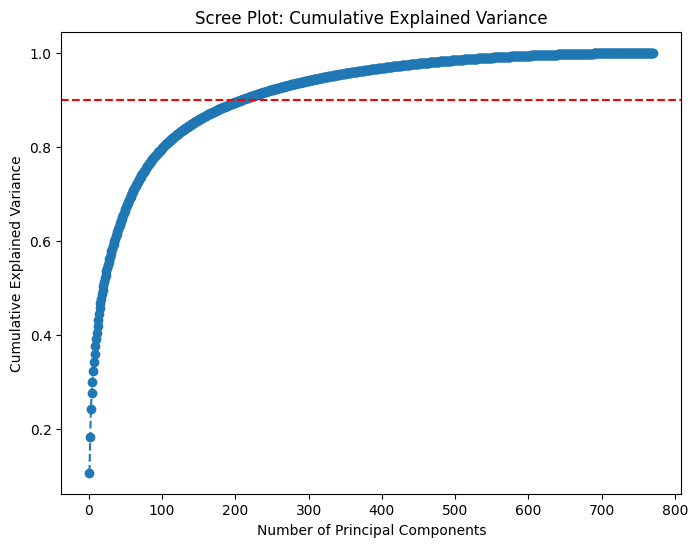

In [32]:
df_num= numeric_df_filtered.drop(columns=['grit','moa_encoded','batch_encoded'])
scaler=StandardScaler()
test_pca=scaler.fit_transform(df_num)
df_pca=pd.DataFrame(test_pca)
pca = PCA()
pca.fit(df_pca)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.show()

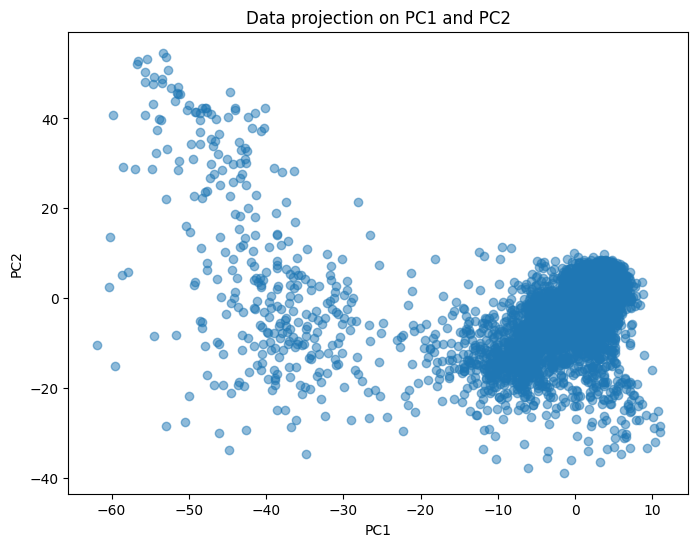

In [33]:
pca = PCA(n_components=250)
data_pca = pca.fit_transform(df_pca)
df_trans = pd.DataFrame(data=data_pca)

plt.figure(figsize=(8, 6))
scatter=plt.scatter(df_trans[0], df_trans[1], alpha=0.5)
plt.title("Data projection on PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

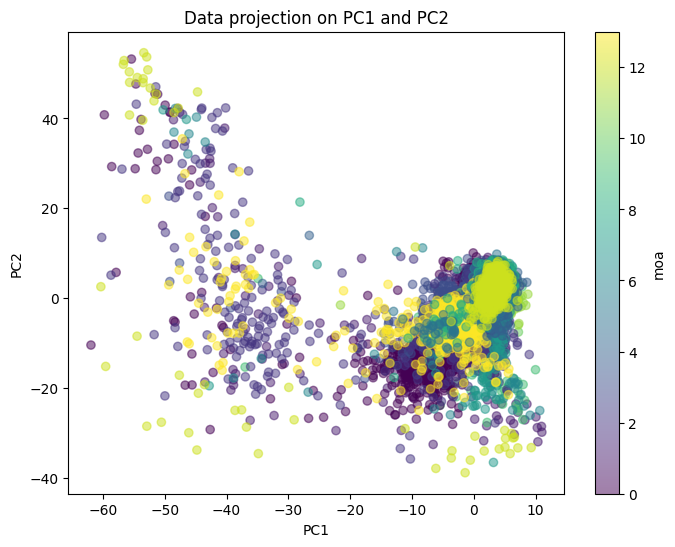

In [99]:
plt.figure(figsize=(8, 6))
scatter=plt.scatter(df_trans[0], df_trans[1],c= numeric_df_filtered['moa_encoded'],cmap='viridis', alpha=0.5)
plt.title("Data projection on PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="moa")
plt.show()

In [100]:
df_num.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,cbkid_encoded
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,-0.161963,3.677716,-4.581176,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,256.0


In [101]:
numeric_cols = df_num.columns

# Perform normality tests for each numeric column
normality_results = {}

for col in numeric_cols:
    stat, p = stats.shapiro(df[col].dropna())  # Shapiro-Wilk test
    
    normality_results[col] = {
        "Shapiro-Wilk Test Statistic": stat,
        "p-value": p,
        "Normality": "Yes" if p > 0.05 else "No"
    }

normality_results
#not normally distributed by Shapiro Wilkins test

KeyError: 'cbkid_encoded'

In [ ]:
corr_matrix = df_num.corr()

# Set a threshold for the correlations
threshold = 0.7
strong_corr = corr_matrix[corr_matrix.abs() > threshold]
#print(corr_matrix)
#Visualize only the strong correlations
sns.heatmap(strong_corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_num.shape

In [35]:
numeric_df_filtered.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,grit,moa_encoded,batch_encoded,cbkid_encoded
0,1.705456,-2.934761,-1.143295,-2.828956,-4.020483,2.772619,2.443803,-2.003713,3.326176,-2.515262,...,3.418656,5.845148,-1.309346,-2.321592,-1.184196,1.225049,5.053471,1.0,160.0,256.0
1,-2.434752,-0.534423,-1.569052,-2.308481,-1.798197,2.235688,2.859903,0.115828,-0.318770,-1.558695,...,1.137231,3.155821,-1.090688,-0.961780,-0.225351,2.082146,4.081928,1.0,151.0,17.0
2,-1.407123,-1.580495,1.503462,-0.971894,-0.767465,0.929572,-3.707079,-1.433107,-1.451932,0.767384,...,4.014021,-0.710926,-1.180859,6.546944,9.815185,-5.949243,3.134159,1.0,247.0,123.0
3,-2.572814,-0.493766,-0.661199,0.284410,1.935428,-0.268836,1.669012,-3.439517,0.040008,1.307236,...,1.129777,4.231125,0.610161,-1.952749,-2.363208,1.150569,2.779069,1.0,268.0,195.0
4,-0.711911,2.387836,0.502729,0.553082,-0.425526,-0.521758,3.677984,2.032266,-0.132177,-0.797386,...,1.549396,1.252517,-1.792015,-0.740876,-5.224329,-0.961893,1.636044,1.0,207.0,115.0


In [36]:
model_df=numeric_df_filtered.drop(columns=['batch_encoded','grit'])
model_df.tail(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_FormFactor_nuclei,AreaShape_Orientation_nuclei,AreaShape_Zernike_1_1_nuclei,AreaShape_Zernike_4_0_nuclei,AreaShape_Zernike_4_2_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,moa_encoded,cbkid_encoded
8865,0.527873,1.131654,0.121395,-2.02567,-2.396145,1.919833,1.38655,2.10522,0.485585,-0.959529,...,0.337613,0.601659,0.298157,-1.0048,-1.238472,1.374167,-1.032509,-0.558638,12.0,190.0


In [353]:
model_df.to_csv('model_df.csv')

In [37]:
batch_ids_by_class = model_df.groupby('moa_encoded')['cbkid_encoded'].unique().to_dict()

# Step 2: Create a dictionary to hold train and test batch_ids
train_batches = []
test_batches = []

# Step 3: Split each class into train and test while ensuring batch_ids do not overlap
for moa_class, batch_ids in batch_ids_by_class.items():
    train, test = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    test_batches.extend(test)

# Step 4: Create the train and test DataFrames based on batch_ids
train_df = model_df[model_df['cbkid_encoded'].isin(train_batches)].reset_index(drop=True)
test_df = model_df[model_df['cbkid_encoded'].isin(test_batches)].reset_index(drop=True)

In [38]:
train_set=set(train_df['cbkid_encoded'].unique())
test_set=set(test_df['cbkid_encoded'].unique())
common_batch_ids = train_set.intersection(test_set)

if common_batch_ids:
    print("Common comp present in both train and test sets:")
    print(common_batch_ids)
else:
    print("No common comp present in both sets.")

No common comp present in both sets.


In [39]:
batch_ids_by_class = train_df.groupby('moa_encoded')['cbkid_encoded'].unique().to_dict()

# Step 2: Create a dictionary to hold train and validation batch_ids
train_batches = []
val_batches = []


for moa_class, batch_ids in batch_ids_by_class.items():
    train, val = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    val_batches.extend(val)

train_final_df = train_df[train_df['cbkid_encoded'].isin(train_batches)].reset_index(drop=True)
val_df = train_df[train_df['cbkid_encoded'].isin(val_batches)].reset_index(drop=True)

In [40]:
train_final_df['moa_encoded'].value_counts()

moa_encoded
9.0     435
3.0     433
11.0    432
1.0     431
10.0    431
0.0     413
2.0     413
6.0     378
7.0     354
13.0    334
8.0     324
5.0     324
4.0     323
12.0    313
Name: count, dtype: int64

In [41]:
train_final_df=train_final_df.drop(columns=['cbkid_encoded'],inplace=False)
val_df=val_df.drop(columns=['cbkid_encoded'],inplace=False)
test_df=test_df.drop(columns=['cbkid_encoded'],inplace=False)

In [42]:
X_train = train_final_df.drop(['moa_encoded'], axis=1)
y_train = train_final_df['moa_encoded']
X_val = val_df.drop(['moa_encoded'], axis=1)
y_val=val_df['moa_encoded']
X_test = test_df.drop(['moa_encoded'], axis=1)
y_test=test_df['moa_encoded']

In [43]:
scaler=StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s=scaler.transform(X_val)
X_test_s=scaler.transform(X_test)

In [44]:
num_features = X_train_s.shape[1]
num_features

769

In [45]:
train_final_df.shape

(5338, 770)

In [46]:
val_df.shape

(1580, 770)

In [47]:
knn = KNeighborsClassifier(n_neighbors=100,weights='uniform',metric='euclidean')  
knn.fit(X_train_s, y_train) 
y_train_pred_knn = knn.predict(X_train_s)
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
print(f'Training Accuracy knn: {train_acc_knn:.2f}')

Training Accuracy knn: 0.40


In [48]:
y_val_pred_knn = knn.predict(X_val_s)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f"Validation Accuracy knn: {val_accuracy_knn:.2f}")

Validation Accuracy knn: 0.23


In [84]:
y_test_pred_knn = knn.predict(X_test_s)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"test Accuracy knn: {test_accuracy_knn:.2f}")

test Accuracy knn: 0.30


In [85]:
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.51      0.63       179
         1.0       0.23      0.06      0.10       172
         2.0       0.96      0.27      0.42       174
         3.0       0.57      0.87      0.69       123
         4.0       0.09      0.05      0.06       144
         5.0       0.22      0.30      0.25       108
         6.0       0.20      0.09      0.13       141
         7.0       0.00      0.00      0.00       143
         8.0       0.17      0.39      0.24       108
         9.0       0.36      0.38      0.37       146
        10.0       0.32      0.34      0.33       125
        11.0       0.15      0.60      0.23       144
        12.0       0.00      0.00      0.00       108
        13.0       0.48      0.36      0.41       133

    accuracy                           0.30      1948
   macro avg       0.33      0.30      0.28      1948
weighted avg       0.35      0.30      0.28      1948



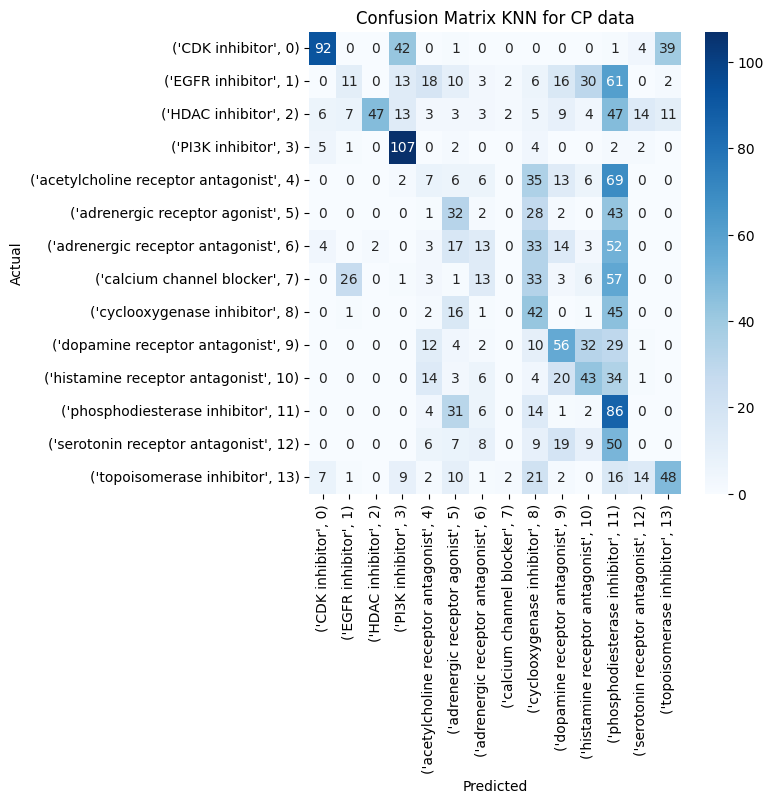

In [118]:
cm = confusion_matrix(y_test, y_test_pred_knn)
class_names = [
    ('CDK inhibitor', 0), 
    ('EGFR inhibitor', 1), 
    ('HDAC inhibitor', 2), 
    ('PI3K inhibitor', 3), 
    ('acetylcholine receptor antagonist', 4), 
    ('adrenergic receptor agonist', 5), 
    ('adrenergic receptor antagonist', 6), 
    ('calcium channel blocker', 7), 
    ('cyclooxygenase inhibitor', 8), 
    ('dopamine receptor antagonist', 9), 
    ('histamine receptor antagonist', 10), 
    ('phosphodiesterase inhibitor', 11), 
    ('serotonin receptor antagonist', 12), 
    ('topoisomerase inhibitor', 13)
]
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN for CP data')
plt.show()


In [75]:
svm_poly = SVC(kernel='poly', degree=2, coef0=1, C=0.4,probability=True, random_state=2)
svm_poly.fit(X_train_s, y_train)
y_train_pred_poly = svm_poly.predict(X_train_s)
train_acc = accuracy_score(y_train, y_train_pred_poly)
print(f'Training Accuracy: {train_acc:.2f}')

Training Accuracy: 0.62


In [76]:
y_val_pred_poly = svm_poly.predict(X_val_s)
val_accuracy_poly = accuracy_score(y_val, y_val_pred_poly)
print(f"Validation Accuracy: {val_accuracy_poly:.2f}")

Validation Accuracy: 0.31


In [86]:
print(classification_report(y_test,y_test_pred_poly))

              precision    recall  f1-score   support

         0.0       0.74      0.86      0.79       179
         1.0       0.54      0.30      0.39       172
         2.0       0.79      0.64      0.71       174
         3.0       0.91      0.72      0.80       123
         4.0       0.13      0.06      0.08       144
         5.0       0.19      0.19      0.19       108
         6.0       0.28      0.21      0.24       141
         7.0       0.18      0.08      0.11       143
         8.0       0.24      0.19      0.22       108
         9.0       0.30      0.34      0.32       146
        10.0       0.33      0.49      0.39       125
        11.0       0.18      0.62      0.28       144
        12.0       0.00      0.00      0.00       108
        13.0       0.70      0.70      0.70       133

    accuracy                           0.41      1948
   macro avg       0.39      0.39      0.37      1948
weighted avg       0.42      0.41      0.39      1948



In [77]:
y_test_pred_poly = svm_poly.predict(X_test_s)
test_accuracy_poly = accuracy_score(y_test, y_test_pred_poly)
print(f"test Accuracy poly: {test_accuracy_poly:.2f}")

test Accuracy poly: 0.41


In [87]:
svm = SVC(kernel='rbf', C=3, gamma='scale',probability=True, random_state=2)
svm.fit(X_train_s, y_train)
y_train_pred_svm = svm.predict(X_train_s)
train_acc = accuracy_score(y_train, y_train_pred_svm)
print(f'Training Accuracy rbf: {train_acc:.2f}')

Training Accuracy rbf: 0.86


In [ ]:
y_val_pred_rbf = svm.predict(X_val_s)
val_accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)
print(f"Validation Accuracy: {val_accuracy_rbf:.2f}")

In [89]:
y_test_pred_rbf = svm.predict(X_test_s)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)
print(f"test Accuracy poly: {test_accuracy_rbf:.2f}")

test Accuracy poly: 0.42


In [90]:
print(classification_report(y_test,y_test_pred_rbf))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       179
         1.0       0.45      0.29      0.35       172
         2.0       0.58      0.76      0.66       174
         3.0       0.92      0.68      0.79       123
         4.0       0.14      0.10      0.12       144
         5.0       0.28      0.38      0.33       108
         6.0       0.32      0.38      0.35       141
         7.0       0.34      0.22      0.26       143
         8.0       0.23      0.31      0.26       108
         9.0       0.39      0.40      0.39       146
        10.0       0.28      0.36      0.32       125
        11.0       0.22      0.31      0.26       144
        12.0       0.19      0.03      0.05       108
        13.0       0.62      0.65      0.64       133

    accuracy                           0.42      1948
   macro avg       0.41      0.41      0.40      1948
weighted avg       0.42      0.42      0.41      1948



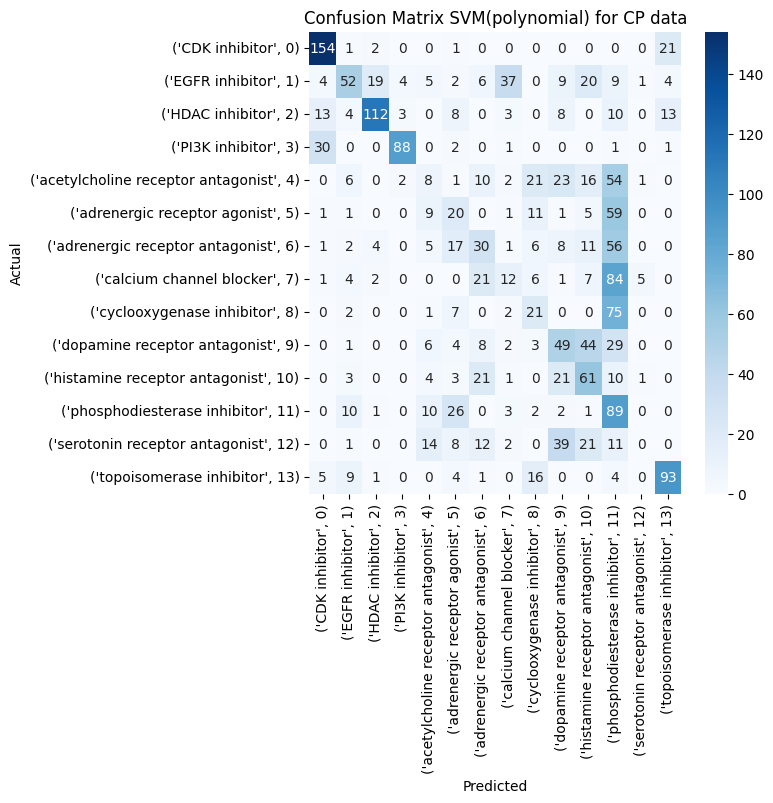

In [140]:
cm = confusion_matrix(y_test, y_test_pred_poly)
class_names = [
    ('CDK inhibitor', 0), 
    ('EGFR inhibitor', 1), 
    ('HDAC inhibitor', 2), 
    ('PI3K inhibitor', 3), 
    ('acetylcholine receptor antagonist', 4), 
    ('adrenergic receptor agonist', 5), 
    ('adrenergic receptor antagonist', 6), 
    ('calcium channel blocker', 7), 
    ('cyclooxygenase inhibitor', 8), 
    ('dopamine receptor antagonist', 9), 
    ('histamine receptor antagonist', 10), 
    ('phosphodiesterase inhibitor', 11), 
    ('serotonin receptor antagonist', 12), 
    ('topoisomerase inhibitor', 13)
]
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM(polynomial) for CP data')
plt.show()

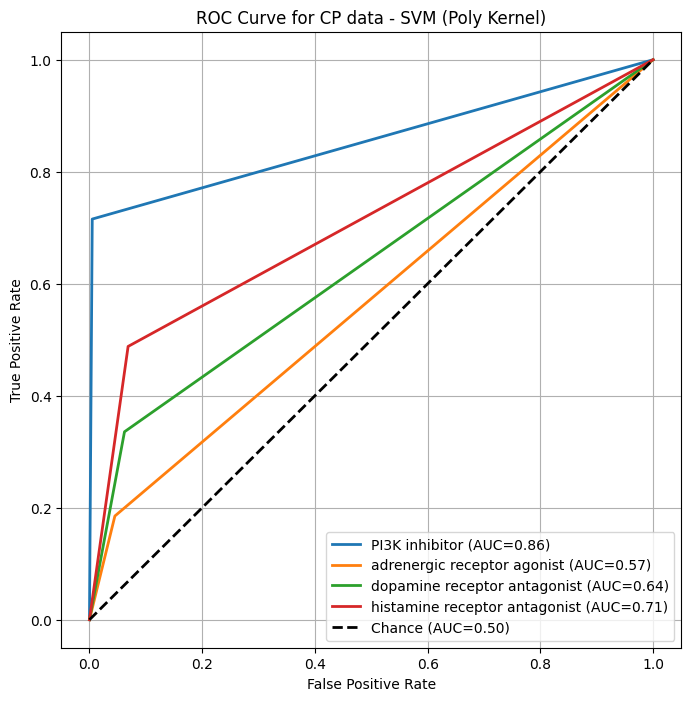

In [98]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
selected_classes = [3,5,9,10]
selected_class_names = ['PI3K inhibitor','adrenergic receptor agonist', 'dopamine receptor antagonist','histamine receptor antagonist']


# Step 1: Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_test, classes=selected_classes)
y_test_bin = label_binarize(y_test_pred_poly, classes=selected_classes)

n_classes = y_true_bin.shape[1]  # Should be 5 for selected classes

# Step 2: Compute FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_test_bin[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_test_bin[:, i])

# Step 3: Plot the ROC Curve for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{selected_class_names[i]} (AUC={roc_auc[i]:.2f})')

# Step 4: Plot reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC=0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CP data - SVM (Poly Kernel)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

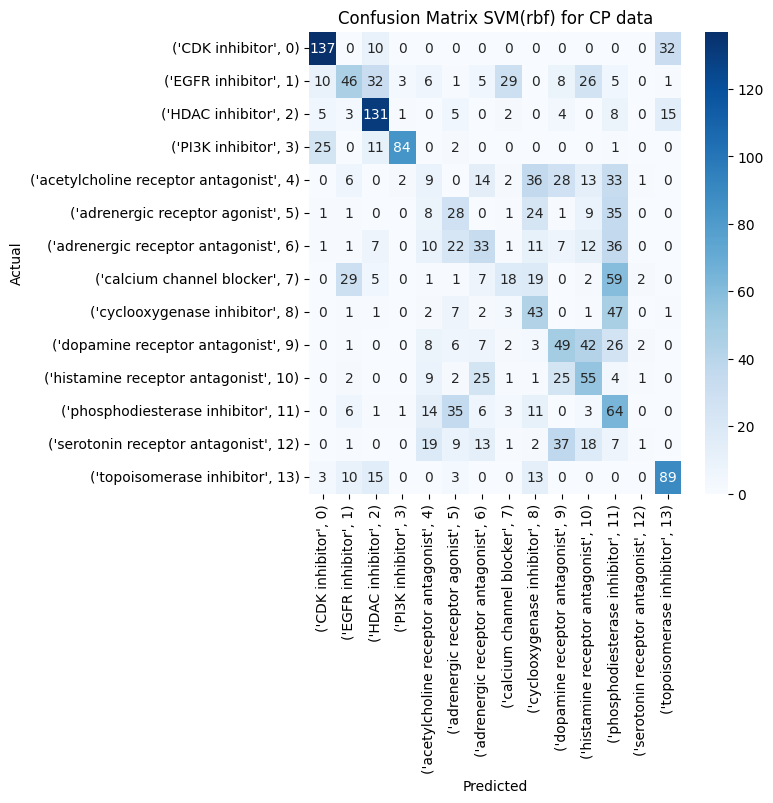

In [141]:
cm = confusion_matrix(y_test, y_test_pred_rbf)
class_names = [
    ('CDK inhibitor', 0), 
    ('EGFR inhibitor', 1), 
    ('HDAC inhibitor', 2), 
    ('PI3K inhibitor', 3), 
    ('acetylcholine receptor antagonist', 4), 
    ('adrenergic receptor agonist', 5), 
    ('adrenergic receptor antagonist', 6), 
    ('calcium channel blocker', 7), 
    ('cyclooxygenase inhibitor', 8), 
    ('dopamine receptor antagonist', 9), 
    ('histamine receptor antagonist', 10), 
    ('phosphodiesterase inhibitor', 11), 
    ('serotonin receptor antagonist', 12), 
    ('topoisomerase inhibitor', 13)
]
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM(rbf) for CP data')
plt.show()

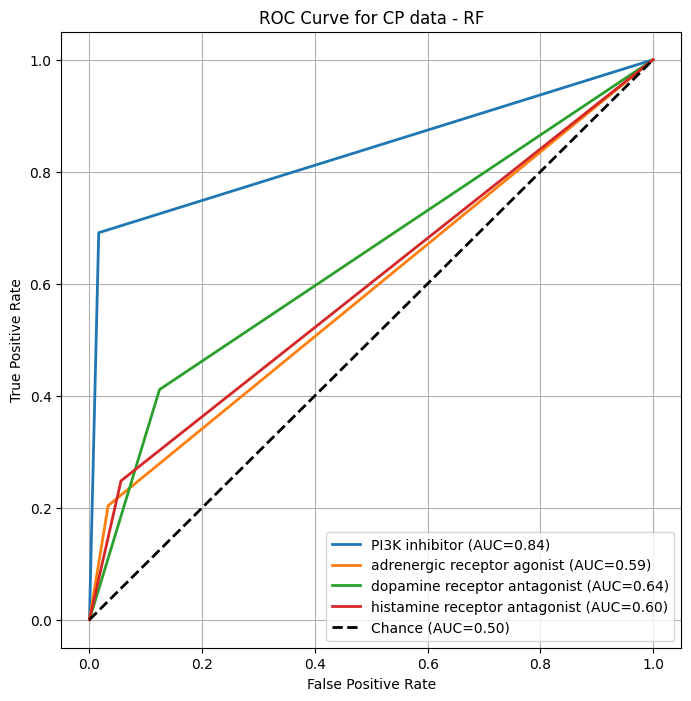

In [99]:
selected_classes = [3,5,9,10]
selected_class_names = ['PI3K inhibitor','adrenergic receptor agonist', 'dopamine receptor antagonist','histamine receptor antagonist']
# Step 1: Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_test, classes=selected_classes)
y_test_bin = label_binarize(y_test_pred, classes=selected_classes)

n_classes = y_true_bin.shape[1]  # Should be 5 for selected classes

# Step 2: Compute FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_test_bin[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_test_bin[:, i])

# Step 3: Plot the ROC Curve for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{selected_class_names[i]} (AUC={roc_auc[i]:.2f})')

# Step 4: Plot reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC=0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CP data - RF')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,  # Number of trees in the forest
    max_depth=12,  
    min_samples_split=10, 
    min_samples_leaf=3,  
    max_features="sqrt",  # Number of features considered for best split
    bootstrap=True,  
    random_state=4
)
rf.fit(X_train_s, y_train)
y_train_pred_rf = rf.predict(X_train_s)
train_acc = accuracy_score(y_train, y_train_pred_rf)
print(f'Training Accuracy rf: {train_acc:.2f}')

Training Accuracy rf: 0.86


In [67]:
y_val_pred_rf = rf.predict(X_val_s)
val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy rf: {val_accuracy:.2f}")

Validation Accuracy rf: 0.35


In [92]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       179
         1.0       0.31      0.27      0.29       172
         2.0       0.61      0.70      0.65       174
         3.0       0.74      0.69      0.71       123
         4.0       0.03      0.01      0.01       144
         5.0       0.27      0.20      0.23       108
         6.0       0.22      0.09      0.13       141
         7.0       0.72      0.25      0.37       143
         8.0       0.27      0.33      0.30       108
         9.0       0.21      0.41      0.28       146
        10.0       0.23      0.25      0.24       125
        11.0       0.23      0.53      0.32       144
        12.0       0.38      0.03      0.05       108
        13.0       0.53      0.82      0.64       133

    accuracy                           0.39      1948
   macro avg       0.39      0.38      0.35      1948
weighted avg       0.40      0.39      0.37      1948



In [68]:
y_test_pred = rf.predict(X_test_s)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"test Accuracy rf: {test_accuracy:.2f}")

test Accuracy rf: 0.39


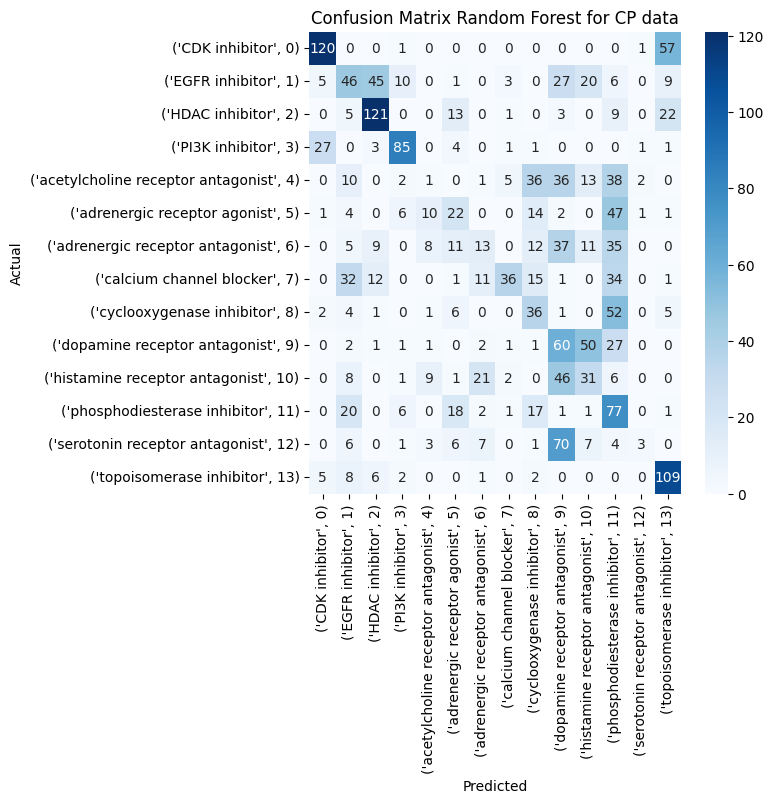

In [69]:
cm = confusion_matrix(y_test, y_test_pred)
class_names = [
    ('CDK inhibitor', 0), 
    ('EGFR inhibitor', 1), 
    ('HDAC inhibitor', 2), 
    ('PI3K inhibitor', 3), 
    ('acetylcholine receptor antagonist', 4), 
    ('adrenergic receptor agonist', 5), 
    ('adrenergic receptor antagonist', 6), 
    ('calcium channel blocker', 7), 
    ('cyclooxygenase inhibitor', 8), 
    ('dopamine receptor antagonist', 9), 
    ('histamine receptor antagonist', 10), 
    ('phosphodiesterase inhibitor', 11), 
    ('serotonin receptor antagonist', 12), 
    ('topoisomerase inhibitor', 13)
]
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest for CP data')
plt.show()

In [276]:
#mlp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_s, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

X_val_tensor = torch.tensor(X_val_s, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(769, 512)    # Input layer to first hidden layer
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 256)     # First hidden layer to second hidden layer
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(256, 128)     # Second hidden layer to third hidden layer
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 64)      # Third hidden layer to fourth hidden layer
        self.fc5 = nn.Linear(64, 14)       # Output layer for 14 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))  
        x = self.dropout3(x)
        
        x = self.fc5(x)                    # Output layer
        return x
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()     # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=7)
# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()           # Clear gradients
        outputs = model(inputs)         # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

    # Print the loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'val Accuracy: {correct / total:.4f}')
loaded_model = MLP()

# Set the model to evaluation mode
loaded_model.eval()

Epoch [1/100], Loss: 2.2375
Epoch [2/100], Loss: 1.9124
Epoch [3/100], Loss: 1.6466
Epoch [4/100], Loss: 2.0428
Epoch [5/100], Loss: 1.6947
Epoch [6/100], Loss: 1.3675
Epoch [7/100], Loss: 1.2307
Epoch [8/100], Loss: 0.9766
Epoch [9/100], Loss: 1.4198
Epoch [10/100], Loss: 1.8205
Epoch [11/100], Loss: 1.4612
Epoch [12/100], Loss: 1.1359
Epoch [13/100], Loss: 1.4590
Epoch [14/100], Loss: 0.9442
Epoch [15/100], Loss: 0.8262
Epoch [16/100], Loss: 0.9473
Epoch [17/100], Loss: 1.1316
Epoch [18/100], Loss: 0.9429
Epoch [19/100], Loss: 0.8993
Epoch [20/100], Loss: 0.7791
Epoch [21/100], Loss: 0.7191
Epoch [22/100], Loss: 1.1037
Epoch [23/100], Loss: 0.6709
Epoch [24/100], Loss: 0.8180
Epoch [25/100], Loss: 0.9722
Epoch [26/100], Loss: 0.7728
Epoch [27/100], Loss: 1.0912
Epoch [28/100], Loss: 0.5910
Epoch [29/100], Loss: 0.5089
Epoch [30/100], Loss: 0.9128
Epoch [31/100], Loss: 0.5458
Epoch [32/100], Loss: 0.7107
Epoch [33/100], Loss: 0.7130
Epoch [34/100], Loss: 0.7338
Epoch [35/100], Loss: 0

MLP(
  (fc1): Linear(in_features=769, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=14, bias=True)
)

In [251]:
from sklearn.utils import class_weight
y_unique = np.unique(np.array(y_train))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes = y_unique,
                y = np.array(y_train)) 
class_weights_dict45 = dict(enumerate(class_weights))

In [252]:
class_weights_dict45

{0: np.float64(0.923209961950882),
 1: np.float64(0.8846536294332118),
 2: np.float64(0.923209961950882),
 3: np.float64(0.8805674694820191),
 4: np.float64(1.1804511278195489),
 5: np.float64(1.1768077601410936),
 6: np.float64(1.008692365835223),
 7: np.float64(1.0770782889426957),
 8: np.float64(1.1768077601410936),
 9: np.float64(0.8765188834154352),
 10: np.float64(0.8846536294332118),
 11: np.float64(0.8826058201058201),
 12: np.float64(1.2181652213601095),
 13: np.float64(1.141573994867408)}

In [310]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_s, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

X_val_tensor = torch.tensor(X_val_s, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

 #Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Add batch normalization
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Add batch normalization
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))  # Apply batch norm after linear layer
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))  
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize model
input_dim = X_train_s.shape[1]
num_classes = 14
model = MLP(input_dim, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=7)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation step
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    # Adjust learning rate based on validation loss
    scheduler.step(avg_val_loss)

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        #torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("Early stopping triggered.")
        break

# Load the best model
#model.load_state_dict(torch.load("best_model.pth"))

model.eval()

# Final evaluation
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Validation Accuracy: {correct / total:.4f}')


Epoch [1/100], Train Loss: 2.1560, Val Loss: 2.0637, Val Acc: 0.3361
Epoch [2/100], Train Loss: 1.6998, Val Loss: 1.9903, Val Acc: 0.3544
Epoch [3/100], Train Loss: 1.4818, Val Loss: 1.9598, Val Acc: 0.3576
Epoch [4/100], Train Loss: 1.3297, Val Loss: 1.9928, Val Acc: 0.3658
Epoch [5/100], Train Loss: 1.2372, Val Loss: 2.1480, Val Acc: 0.3456
Epoch [6/100], Train Loss: 1.1281, Val Loss: 2.1535, Val Acc: 0.3500
Epoch [7/100], Train Loss: 1.0664, Val Loss: 2.2624, Val Acc: 0.3373
Epoch [8/100], Train Loss: 1.0164, Val Loss: 2.2920, Val Acc: 0.3519
Epoch [9/100], Train Loss: 0.9556, Val Loss: 2.3228, Val Acc: 0.3354
Epoch [10/100], Train Loss: 0.8826, Val Loss: 2.4666, Val Acc: 0.3323
Epoch [11/100], Train Loss: 0.8317, Val Loss: 2.4963, Val Acc: 0.3285
Epoch [12/100], Train Loss: 0.7458, Val Loss: 2.5203, Val Acc: 0.3297
Epoch [13/100], Train Loss: 0.6976, Val Loss: 2.5288, Val Acc: 0.3373
Early stopping triggered.
Final Validation Accuracy: 0.3373


In [311]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor = torch.tensor(X_test_s, dtype=torch.float32).to(device)
model.eval()
model.to(device)
X_test_tensor = X_test_tensor.to(device)
with torch.no_grad():  # Disable gradient computation
    logits = model(X_test_tensor)  # Forward pass
    predictions = torch.argmax(logits, dim=1)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)  # Ensure dtype matches
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 42.51%


LightGBM


In [70]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_train_s, label=y_train)
dval = lgb.Dataset(X_val_s, label=y_val, reference=dtrain)

# Define model parameters with GPU support
params = {
    'objective': 'multiclass',    # For classification
    'num_class': 14,               # Number of classes
    'max_depth': 5,               # Maximum depth of trees
    'learning_rate': 0.1,         # Learning rate (similar to eta in XGBoost)
    'metric': 'multi_logloss',    # Evaluation metri         
    'seed': 42,                    # For reproducibility
}

# Train the LightGBM model
num_rounds = 10
model = lgb.train(params, 
                  dtrain, 
                  num_boost_round=num_rounds, 
                  valid_sets=[dtrain, dval], 
                  valid_names=['train', 'eval'], 
                  )

# Predict on training data
y_train_pred_lgb = model.predict(X_train_s)
y_train_pred_lgb = [list(row).index(max(row)) for row in y_train_pred_lgb]  # Get the class with highest probability

# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lgb))
val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(classification_report(y_train, y_train_pred_lgb))

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=5) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=5) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=32) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.802265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196094
[LightGBM] [Info] Number of data points in the train set: 5338, number of used features: 769
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=5) without explicitly setting 'num

In [71]:
y_val_pred_lgb = model.predict(X_val_s)
y_val_pred_lgb = [list(row).index(max(row)) for row in y_val_pred_lgb]  # Get class with highest probability

# Evaluate on validation data
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_lgb))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_lgb))

Validation Accuracy: 0.3556962025316456

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       108
         1.0       0.30      0.20      0.24        97
         2.0       0.68      0.75      0.71       106
         3.0       0.93      0.63      0.75       144
         4.0       0.14      0.11      0.13       106
         5.0       0.13      0.08      0.10       108
         6.0       0.28      0.20      0.24       108
         7.0       0.06      0.03      0.04       108
         8.0       0.18      0.13      0.15       108
         9.0       0.22      0.43      0.29       119
        10.0       0.20      0.33      0.25       144
        11.0       0.20      0.36      0.26       108
        12.0       0.05      0.03      0.04       108
        13.0       0.71      0.82      0.76       108

    accuracy                           0.36      1580
   macro avg       0.36      0.35      0.34      1580
weigh

In [72]:
y_test_pred_lgb = model.predict(X_test_s)
y_test_pred_lgb = [list(row).index(max(row)) for row in y_test_pred_lgb]  # Get class with highest probability

# Evaluate on validation data
print("test Accuracy:", accuracy_score(y_test, y_test_pred_lgb))
print("\ntest Classification Report:")
print(classification_report(y_test, y_test_pred_lgb))

test Accuracy: 0.40965092402464065

test Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       179
         1.0       0.37      0.25      0.30       172
         2.0       0.64      0.73      0.68       174
         3.0       0.80      0.73      0.77       123
         4.0       0.08      0.04      0.06       144
         5.0       0.27      0.33      0.30       108
         6.0       0.18      0.14      0.16       141
         7.0       0.45      0.27      0.34       143
         8.0       0.29      0.39      0.33       108
         9.0       0.19      0.29      0.23       146
        10.0       0.23      0.27      0.25       125
        11.0       0.24      0.36      0.28       144
        12.0       0.11      0.04      0.06       108
        13.0       0.69      0.80      0.74       133

    accuracy                           0.41      1948
   macro avg       0.38      0.39      0.38      1948
weighted avg    